In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression


### Load Data

In [54]:
!pwd

/app/digicow/notebooks


In [175]:
## Loading the data
train_df = pd.read_csv('/app/digicow/data/Train.csv')
test_df = pd.read_csv('/app/digicow/data/Test.csv')
#y_true = pd.read_csv('reference.csv')['Target_AUC']

### Exploratory Data Analysis

In [176]:
train_df.head()

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_topic_trained_on,trainer,topics_list
0,ID_CENCC8,FAR_eqbhscj,2024-01-03,Female,Manual,Above 35,GRP_yvpakgc,0,CNT_lpotuu,SUB_lpotuuf,WRD_lpotuufh,0,0,0,0,['TRA_szrwyfzz'],"[['Ndume App', 'Poultry Feeding']]"
1,ID_YTO0FF,FAR_qlwtyik,2024-01-03,Female,Manual,Above 35,GRP_zemrbsy,1,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Poultry Housing'], ['Poultry Housing']]"
2,ID_1476PE,FAR_somfzxp,2024-01-03,Female,Manual,Above 35,GRP_zmblxsw,0,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Asili Fertilizer (Organic)', 'Biosecurity I..."
3,ID_MLKLIR,FAR_ongcqyd,2024-01-03,Female,Manual,Above 35,GRP_psdrfni,0,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Poultry Products'], ['Record Keeping In Dai..."
4,ID_V5ZVTA,FAR_ztsbhhm,2024-01-03,Female,Ussd,Below 35,GRP_yvpakgc,0,CNT_lpotuu,SUB_lpotuuf,WRD_lpotuufh,0,0,0,0,['TRA_szrwyfzz'],"[['Ndume App', 'Poultry Feeding']]"


In [13]:
train_df.shape

(13536, 17)

In [71]:
train_df.farmer_name.nunique(), train_df.ID.nunique()

(13536, 13536)

In [74]:
train_df.training_day.dtypes

dtype('O')

In [70]:
train_df.isna().sum()

ID                         0
farmer_name                0
training_day               0
gender                     0
registration               0
age                        0
group_name                 0
belong_to_cooperative      0
county                     0
subcounty                  0
ward                       0
adopted_within_07_days     0
adopted_within_90_days     0
adopted_within_120_days    0
has_topic_trained_on       0
trainer                    0
topics_list                0
dtype: int64

In [32]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


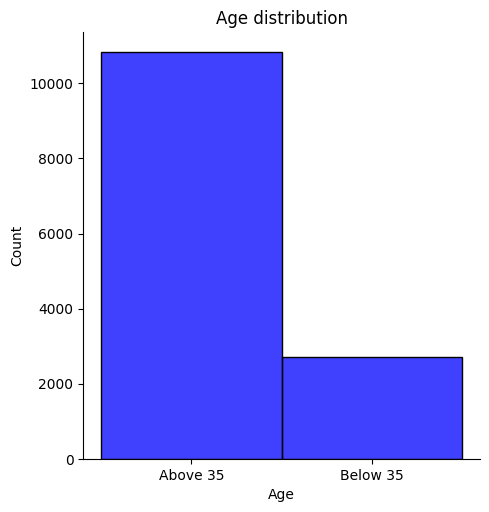

In [28]:
sns.displot(train_df['age'], color='blue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

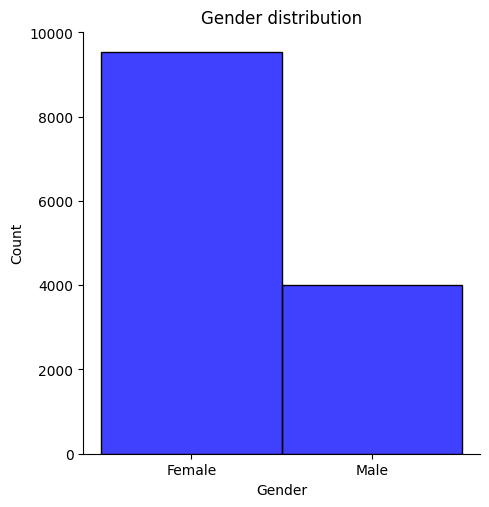

In [30]:
sns.displot(train_df['gender'], color='blue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

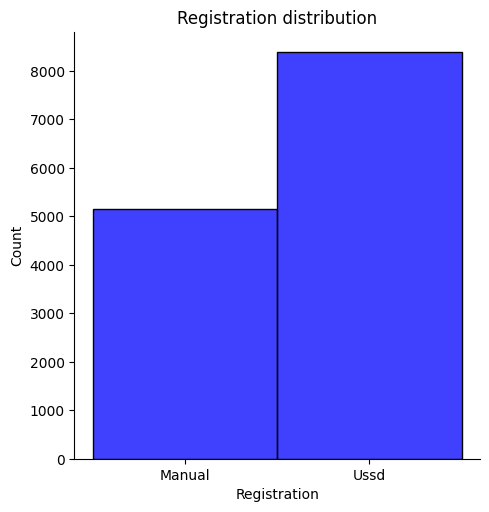

In [36]:
sns.displot(train_df['registration'], color='blue')
plt.title('Registration distribution')
plt.xlabel('Registration')
plt.ylabel('Count')
plt.show()

In [35]:
train_df.group_name.nunique()

864

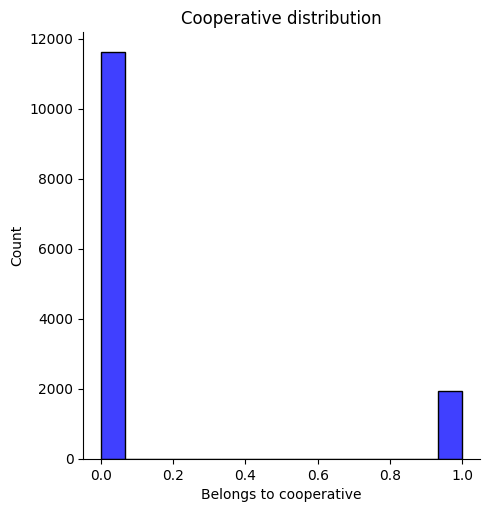

In [37]:
sns.displot(train_df['belong_to_cooperative'], color='blue')
plt.title('Cooperative distribution')
plt.xlabel('Belongs to cooperative')
plt.ylabel('Count')
plt.show()


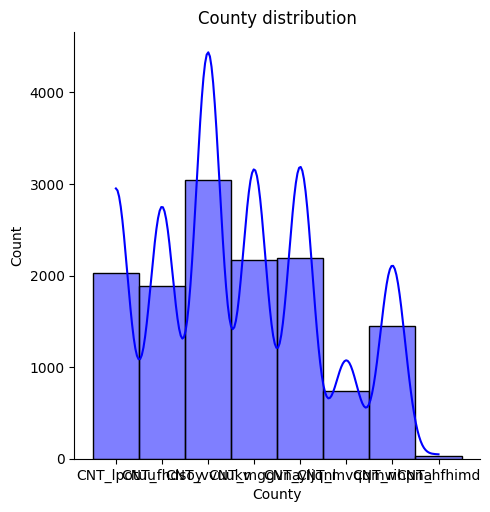

In [63]:
#train_df.county.value_counts()
sns.displot(train_df['county'], color='blue', kde=True)
plt.title('County distribution')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


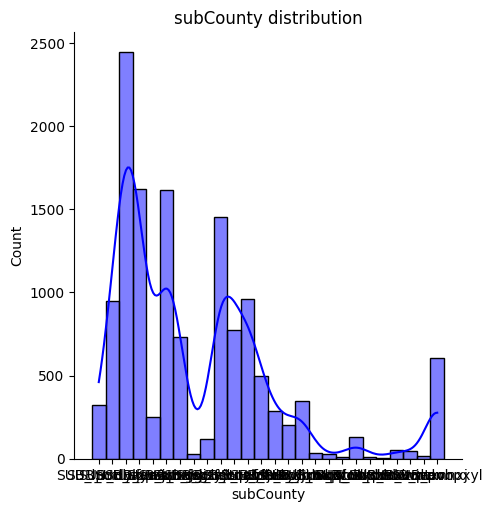

In [64]:
sns.displot(train_df['subcounty'], color='blue', kde=True)
plt.title('subCounty distribution')
plt.xlabel('subCounty')
plt.ylabel('Count')
plt.show()

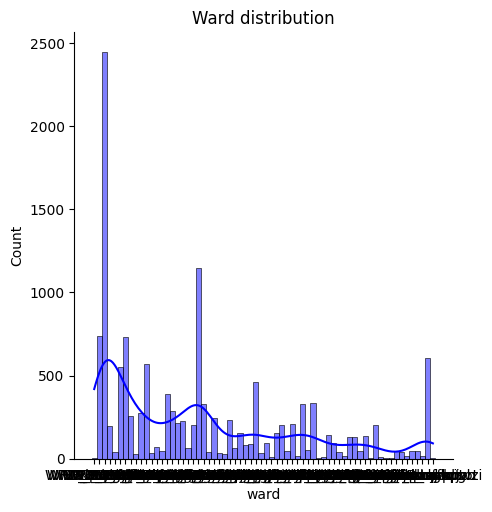

In [65]:
sns.displot(train_df['ward'], color='blue', kde=True)
plt.title('Ward distribution')
plt.xlabel('ward')
plt.ylabel('Count')
plt.show()

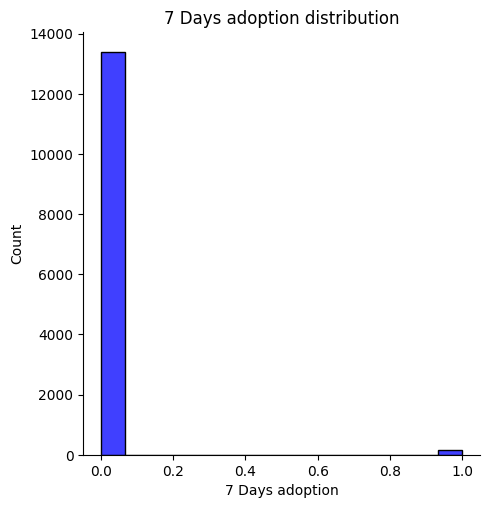

In [49]:
#train_df.adopted_within_07_days.value_counts()
sns.displot(train_df['adopted_within_07_days'], color='blue')
plt.title('7 Days adoption distribution')
plt.xlabel('7 Days adoption')
plt.ylabel('Count')
plt.show()

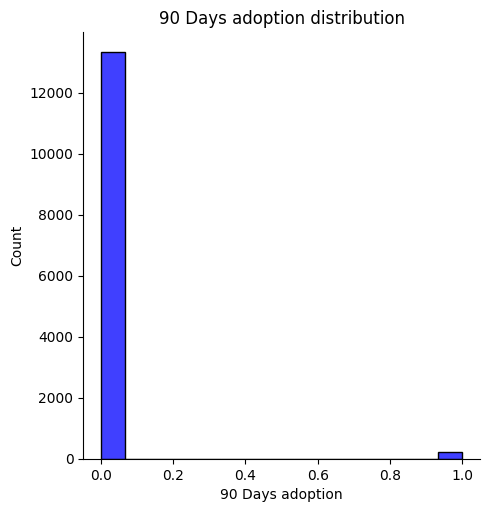

In [50]:
#train_df.adopted_within_90_days.value_counts()
sns.displot(train_df['adopted_within_90_days'], color='blue')
plt.title('90 Days adoption distribution')
plt.xlabel('90 Days adoption')
plt.ylabel('Count')
plt.show()

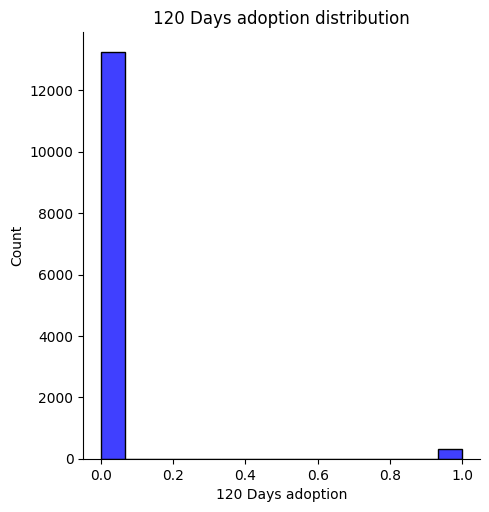

In [51]:
#train_df.adopted_within_120_days.value_counts()
sns.displot(train_df['adopted_within_120_days'], color='blue')
plt.title('120 Days adoption distribution')
plt.xlabel('120 Days adoption')
plt.ylabel('Count')
plt.show()

In [52]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


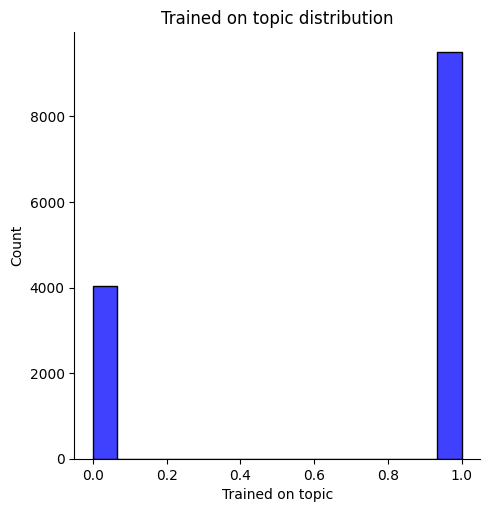

In [56]:
sns.displot(train_df['has_topic_trained_on'], color='blue')
plt.title('Trained on topic distribution')
plt.xlabel('Trained on topic')
plt.ylabel('Count')
plt.show()

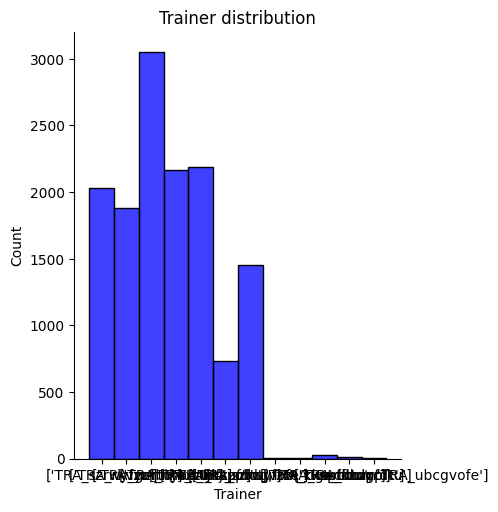

In [58]:
sns.displot(train_df['trainer'], color='blue')
plt.title('Trainer distribution')
plt.xlabel('Trainer')
plt.ylabel('Count')
plt.show()

In [61]:
train_df.topics_list.nunique()

2250

#### Takeaways

- Data is quite imbalanced (gender, age, registration type, co-operative membership, 7/90/120 day adoption)
- The county, subcounty and ward are right skewed 
- **topics_list** is quite messy, might have to figure out a way to clean the data for better analysis ...

### TODO: Figure out how to deal with imbalanced data for categorical prediction. Choose best approach and design models

#### Data cleaning

In [78]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


In [83]:
for c in [col for col in train_df.columns if col.endswith('day')]:
  if c in train_df.columns:
    train_df[c] = pd.to_datetime(train_df[c], errors='coerce')

In [168]:
train_df.dtypes

ID                         object
farmer_name                object
training_day               object
gender                     object
registration               object
age                        object
group_name                 object
belong_to_cooperative       int64
county                     object
subcounty                  object
ward                       object
adopted_within_07_days      int64
adopted_within_90_days      int64
adopted_within_120_days     int64
has_topic_trained_on        int64
trainer                    object
topics_list                object
dtype: object

In [178]:
target_cols = ['adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']
for target_col in target_cols:
    train_df[target_col] = train_df[target_col].astype(int)

##### Load Prior dataset

In [89]:
prior_df = pd.read_csv('/app/digicow/data/Prior.csv')

In [153]:
prior_df.topics_list.sample(3)

40816                              ['Poultry Health Mngt']
41349    ['How To Manage Pest And Diseases At Harvestin...
18973                 ['Disadvantages Of Natural Mating.']
Name: topics_list, dtype: object

In [154]:
train_df.topics_list.sample(3)

2480     [['Reasons Why Ai Fails And Solutions'], ['Her...
12851    [['Poultry Health Mngt'], ['Herd Health. Manag...
11704    [['Importance Of Choosing The Right Seed Varie...
Name: topics_list, dtype: object

In [155]:
test_df.topics_list.sample(5)

1920    [['Weed Management In Maize And Beans'], ['Sil...
4913    [['Clean Energy With Sistema Biogas'], ['Pest ...
1184                       [['Digital Finance With Kcb']]
3045    [['Importance Of Choosing The Right Seed Varie...
4853    [['Pest And Disease Management In Maize And Be...
Name: topics_list, dtype: object

In [177]:
#train_df['topics_list'] = train_df['topics_list'].apply(clean_list)
#test_df['topics_list'] = test_df['topics_list'].apply(clean_list)

In [140]:
test_df.sample()

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,has_topic_trained_on,trainer,topics_list
914,ID_DZTIC5,FAR_vvcrxty,2025-06-08,Male,Manual,Above 35,GRP_lzkxapu,0,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,1,['TRA_rkvyofbh'],"[['Importance Of Vaccinations And Record', 'Li..."


In [97]:
prior_df.shape

(44882, 17)

In [98]:
prior_df.farmer_name.nunique()

6719

In [105]:
for target_col in target_cols:
    prior_df[target_col] = prior_df[target_col].astype(int)

In [116]:
for c in [col for col in prior_df.columns if col.endswith('day')]:
  if c in prior_df.columns:
    prior_df[c] = pd.to_datetime(prior_df[c], errors='coerce')

In [106]:
for col in prior_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


In [110]:
cols = ['gender', 'registration', 'age', 'belong_to_cooperative', 'county', 'subcounty', 'ward', 'adopted_within_07_days', \
            'adopted_within_90_days', 'adopted_within_120_days']

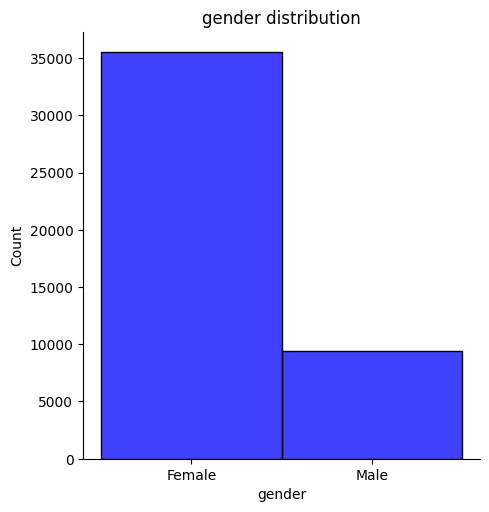

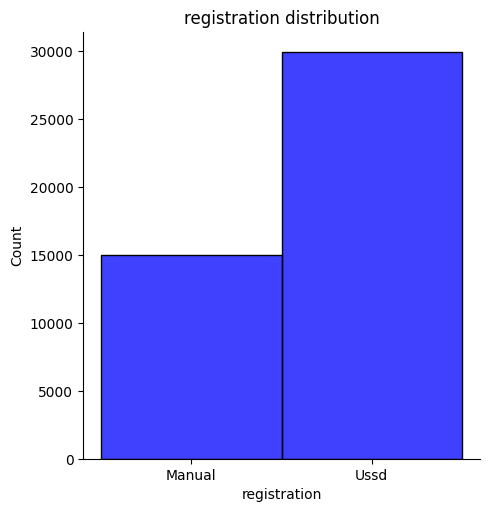

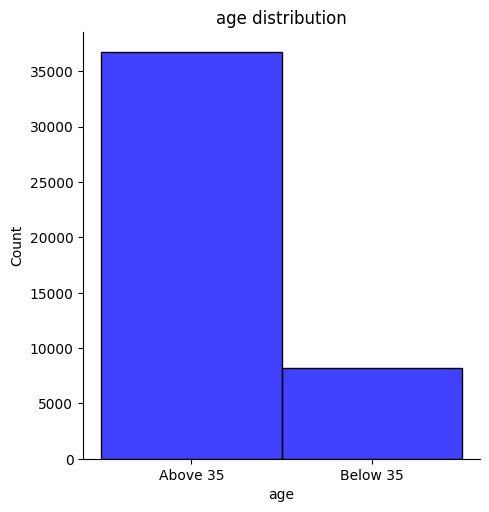

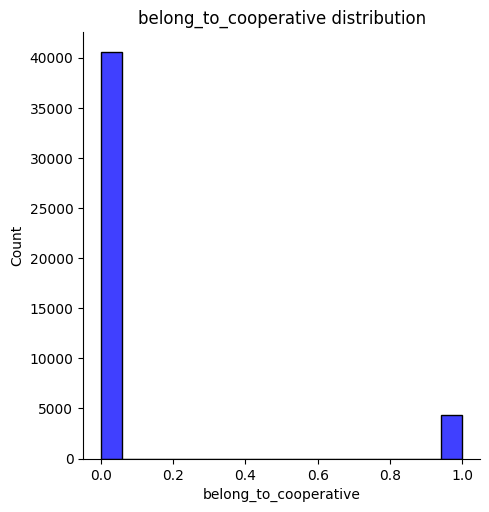

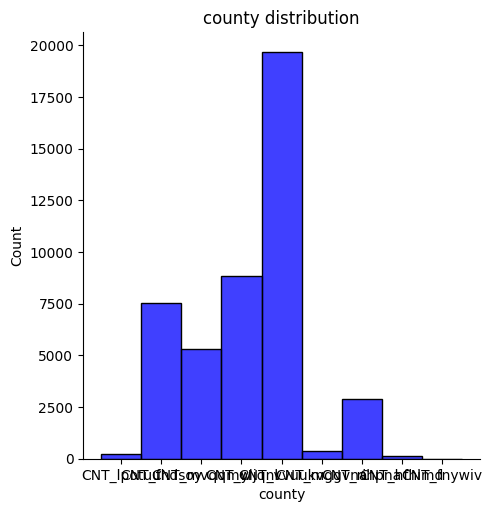

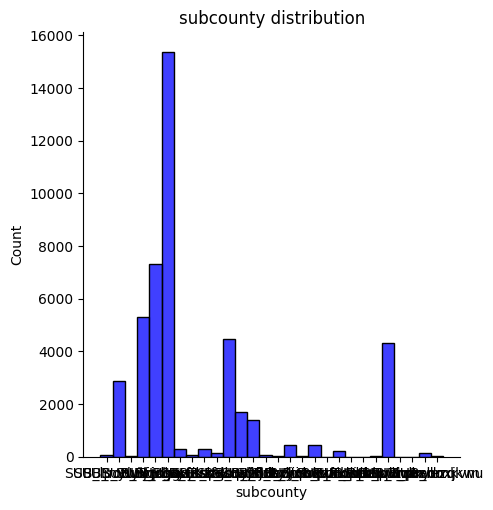

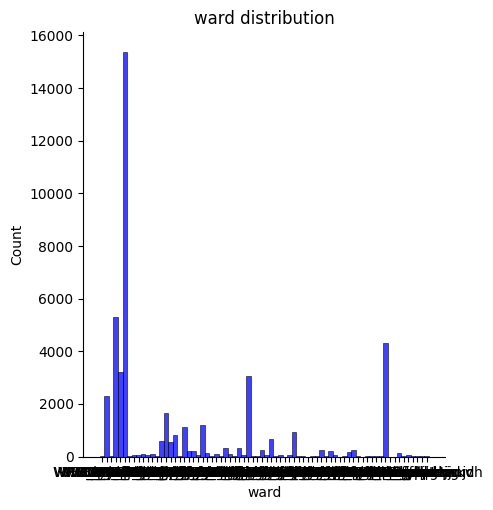

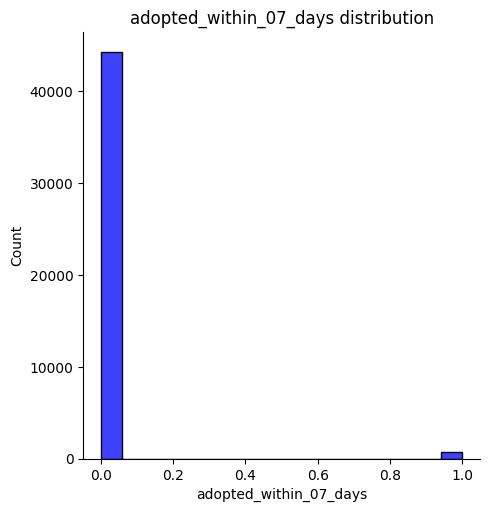

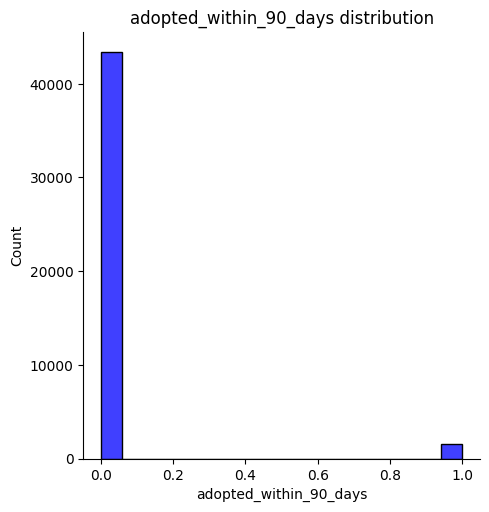

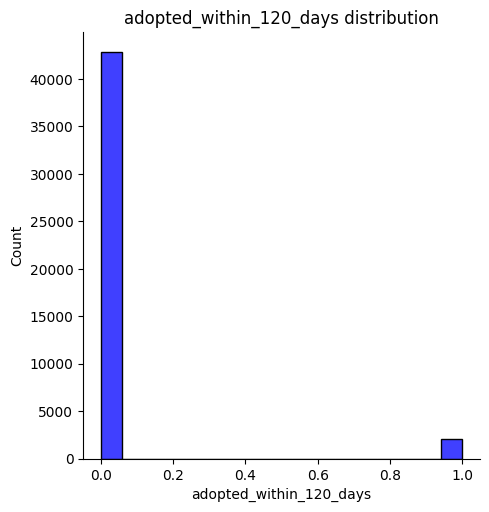

In [113]:
for col in cols:
    sns.displot(prior_df[col], color='blue')
    plt.title(f'{col} distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

In [117]:
# Check overlap between Prior and Train sessions

overlap = prior_df.merge(
    train_df[['farmer_name', 'training_day']],
    on=['farmer_name', 'training_day']
)

print(f"Prior rows: {len(prior_df)}")
print(f"Train rows: {len(train_df)}")
print(f"Exact session overlaps (farmer + date): {len(overlap)}")
print(f"Overlap as % of Train: {len(overlap)/len(train_df)*100:.1f}%")

Prior rows: 44882
Train rows: 13536
Exact session overlaps (farmer + date): 0
Overlap as % of Train: 0.0%


In [125]:
top_farmer = prior_df['farmer_name'].value_counts().index[0]

In [126]:
top_farmer

'FAR_dukawjb'

In [127]:
cols = ['training_day', 'topics_list', 'adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']
display(prior_df[prior_df['farmer_name'] == top_farmer][cols])

,training_day,topics_list,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days
4690,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4691,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4692,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4693,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4694,2024-02-07,['Transition Cow Management- Care For Your Cow...,0,0,0
...,...,...,...,...,...
40225,2025-06-05,['Importance Of Vaccinations And Record'],0,1,1
40226,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0
40227,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0
40228,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0


In [134]:
prior_df[['ID', 'farmer_name', 'training_day']].duplicated().value_counts()

False    44882
Name: count, dtype: int64

# NEXT STEPS: 
1. Change topics_list in train and test to be lists so as to match prior dataset
2. Figure out how to merge with prior dataset
3. Train ML model

In [ ]:
exit()

In [6]:
#train_df_ = pd.read_csv('/app/digicow/data/Train_.csv')
#test_df_ = pd.read_csv('/app/digicow/data/Test_.csv')
#y_true_ = pd.read_csv('reference_.csv')['Target_AUC']

In [35]:
split_summary = pd.DataFrame({
    "set": ["train"],
    "rows": [len(train_df)],
    "positives": [train_df[target_col].sum()],
})
split_summary["pos_rate"] = split_summary["positives"] / split_summary["rows"]

split_summary

,set,rows,positives,pos_rate
0,train,5525,617,0.111674


In [36]:
split_summary_ = pd.DataFrame({
    "set": ["train"],
    "rows": [len(train_df_)],
    "positives": [train_df_[target_col].sum()],
})
split_summary_["pos_rate"] = split_summary_["positives"] / split_summary_["rows"]

split_summary_

,set,rows,positives,pos_rate
0,train,27381,617,0.022534


In [37]:
## Basic model with some selected features
base_features = [
    "gender",
    "registration",
    "age",
    "trainer",
    "belong_to_cooperative",
    "county",
    "subcounty",
    "ward",
]

In [38]:
feature_cols = base_features

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test  = test_df[feature_cols]


X_train_ = train_df_[feature_cols]
y_train_ = train_df_[target_col]

X_test_  = test_df_[feature_cols]

## Make the prediction


In [39]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), feature_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [40]:
preprocess_ = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), feature_cols)
    ]
)

model_ = Pipeline(steps=[
    ("preprocess", preprocess_),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

model_.fit(X_train_, y_train_)
y_pred_prob_ = model.predict_proba(X_test_)[:, 1]
y_pred_ = model_.predict(X_test_)

In [41]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [42]:
## Evaluating some metrics
# ----------------------------
#  Metrics: PR AUC + ROC AUC + Recall@K
# ----------------------------
def recall_at_k(y_true: pd.Series, y_scores: np.ndarray, k_frac: float) -> float:
    k = int(np.ceil(len(y_true) * k_frac))
    order = np.argsort(-y_scores)  # descending
    topk = order[:k]
    return float(y_true.iloc[topk].sum() / y_true.sum()) if y_true.sum() > 0 else np.nan

In [43]:
pr_auc = average_precision_score(y_true, y_pred_prob)
roc_auc = roc_auc_score(y_true, y_pred_prob)
recall_5 = recall_at_k(y_true, y_pred_prob, 0.05)
recall_10 = recall_at_k(y_true, y_pred_prob, 0.10)
recall_20 = recall_at_k(y_true, y_pred_prob, 0.20)

# Naive baselines on this test set
prevalence_test = y_true.mean()
naive_pr_auc = prevalence_test

results = pd.DataFrame({
    "metric": [
        "PR AUC (Average Precision)",
        "ROC AUC",
        "Recall@5%",
        "Recall@10%",
        "Recall@20%",
        "Naive PR AUC (prevalence)",
    ],
    "value": [pr_auc, roc_auc, recall_5, recall_10, recall_20, naive_pr_auc]
})


print("\nSplit summary:")
display(split_summary)
print("\nResults:")
display(results)


Split summary:


,set,rows,positives,pos_rate
0,train,5525,617,0.111674



Results:


,metric,value
0,PR AUC (Average Precision),0.441386
1,ROC AUC,0.860209
2,Recall@5%,0.266917
3,Recall@10%,0.368421
4,Recall@20%,0.597744
5,Naive PR AUC (prevalence),0.111812


In [44]:
y_pred_prob

array([0.66407633, 0.32957527, 0.59670526, ..., 0.00681731, 0.04802049,
       0.06112566])

In [45]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [46]:
pr_auc_ = average_precision_score(y_true_, y_pred_prob_)
roc_auc_ = roc_auc_score(y_true_, y_pred_prob_)
recall_5_ = recall_at_k(y_true_, y_pred_prob_, 0.05)
recall_10_ = recall_at_k(y_true_, y_pred_prob_, 0.10)
recall_20_ = recall_at_k(y_true_, y_pred_prob_, 0.20)

# Naive baselines on this test set
prevalence_test_ = y_true_.mean()
naive_pr_auc_ = prevalence_test_

results_ = pd.DataFrame({
    "metric": [
        "PR AUC (Average Precision)",
        "ROC AUC",
        "Recall@5%",
        "Recall@10%",
        "Recall@20%",
        "Naive PR AUC (prevalence)",
    ],
    "value": [pr_auc_, roc_auc_, recall_5_, recall_10_, recall_20_, naive_pr_auc_]
})


print("\nSplit summary:")
display(split_summary_)
print("\nResults:")
display(results_)


Split summary:


,set,rows,positives,pos_rate
0,train,27381,617,0.022534



Results:


,metric,value
0,PR AUC (Average Precision),0.165191
1,ROC AUC,0.868006
2,Recall@5%,0.327068
3,Recall@10%,0.484962
4,Recall@20%,0.695489
5,Naive PR AUC (prevalence),0.022646


In [47]:
## Make submission file
ss = pd.read_csv('SampleSubmission.csv')
ss['Target_LogLoss'] = y_pred_prob
ss['Target_AUC'] = y_pred_prob
ss.to_csv('BenchmarkSub.csv', index=False)

ss_ = pd.read_csv('SampleSubmission_.csv')
ss_['Target_LogLoss'] = y_pred_prob_
ss_['Target_AUC'] = y_pred_prob_
ss_.to_csv('BenchmarkSub_.csv', index=False)

In [48]:
ss.head()

,ID,Target_AUC,Target_LogLoss
0,ID_VR75BG,0.664076,0.664076
1,ID_D2J0WZ,0.329575,0.329575
2,ID_CWLNAK,0.596705,0.596705
3,ID_9BU2DP,0.946992,0.946992
4,ID_QTX80L,0.360873,0.360873


In [49]:
ss_.head()

,ID,Target_AUC,Target_LogLoss
0,ID_1MNN3I,0.619965,0.619965
1,ID_XOT5G5,0.219667,0.219667
2,ID_OZN7P3,0.783224,0.783224
3,ID_LT5R6J,0.188326,0.188326
4,ID_T35OKD,0.014446,0.014446


In [50]:
ss

,ID,Target_AUC,Target_LogLoss
0,ID_VR75BG,0.664076,0.664076
1,ID_D2J0WZ,0.329575,0.329575
2,ID_CWLNAK,0.596705,0.596705
3,ID_9BU2DP,0.946992,0.946992
4,ID_QTX80L,0.360873,0.360873
...,...,...,...
2374,ID_KM5D53,0.192079,0.192079
2375,ID_WNTVRD,0.016103,0.016103
2376,ID_7N936W,0.006817,0.006817
2377,ID_2PJRH3,0.048020,0.048020


In [51]:
ss_

,ID,Target_AUC,Target_LogLoss
0,ID_1MNN3I,0.619965,0.619965
1,ID_XOT5G5,0.219667,0.219667
2,ID_OZN7P3,0.783224,0.783224
3,ID_LT5R6J,0.188326,0.188326
4,ID_T35OKD,0.014446,0.014446
...,...,...,...
11741,ID_NDOMA0,0.006505,0.006505
11742,ID_LN2XMC,0.043849,0.043849
11743,ID_EOIZLZ,0.004697,0.004697
11744,ID_GENFFO,0.006817,0.006817


In [52]:
from sklearn.metrics import log_loss

In [53]:
## Compute the log-loss
loss = log_loss(y_true, y_pred_prob)
print("LogLoss:", loss)

loss_ = log_loss(y_true_, y_pred_prob_)
print("LogLoss:", loss_)

LogLoss: 0.4692600295166461
LogLoss: 0.4678933473746918


In [54]:
train_df.columns

Index(['ID', 'gender', 'age', 'registration', 'belong_to_cooperative',
       'county', 'subcounty', 'ward', 'trainer', 'first_training_date',
       'topics_list', 'num_trainings_30d', 'num_trainings_60d',
       'num_total_trainings', 'num_repeat_trainings',
       'days_to_second_training', 'num_unique_trainers',
       'adopted_within_07_days', 'has_second_training'],
      dtype='object')

In [55]:
train_df_.columns

Index(['ID', 'gender', 'age', 'registration', 'belong_to_cooperative',
       'county', 'subcounty', 'ward', 'trainer', 'first_training_date',
       'topics_list', 'num_trainings_30d', 'num_trainings_60d',
       'num_total_trainings', 'num_repeat_trainings',
       'days_to_second_training', 'num_unique_trainers',
       'adopted_within_07_days', 'adopted_within_30_days',
       'adopted_within_60_days', 'adopted_within_90_days',
       'adopted_within_120_days', 'has_second_training'],
      dtype='object')